In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import mglearn

# 구간 분할(이산화) - 선형모델, 트리모델

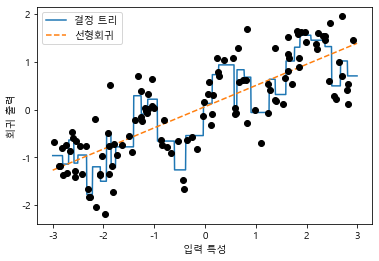

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# wave data set - 입력 특성 1개
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label = '결정 트리')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='선형회귀')
plt.plot(X[:,0], y, 'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

- 선형모델은 특성이 하나일 때 직선으로 나타남
- 결정 트리는 동일 데이터로 훨씬 복잡한 모델을 만들어냄
- 하지만, 데이터의 표현 형태에 따라 달라짐!

## 구간분할(이산화) - 선형모델에 적용
- 한 특성을 여러 특성으로 나누는 구간분할(bining, 이산화) 이용해 선형회귀에 적용시켜보자!
    - 구간 나누기는 연속형 특성을 확장하는 방법 중 하나
- KBinsDiscretizer class
    - 구간의 경계를 정의하는 방법(KBinsDiscretizer class에 여러 방법 구현되어있음)
        1. 균일한 너비로(구간의 경계 간의 거리가 동일하게)
        2. 데이터의 분위 사용(데이터가 많은 구간은 좁아짐)
        ... 등
    - 한번에 여러 개의 특성에 적용할 수 있음
        - transform 메서드로 각 데이터 포인트를 해당되는 구간으로 Encoding (구간에 OneHotEncoding 적용)
        - 희소 행렬을 만듬(변환된 데이터는 n차원)
    - .bin_edges_는 특성별로 경계값이 저장되어있음(n차원 NumPy 배열 )

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

# 10개 구간으로 나누기!
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


- 첫번째 구간: -2.9668673(가장작은 값부터) ~ -2.37804841까지
- 두번째 구간: -2.37804841 ~ -1.78922951까지
- ...

In [7]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

- 10개 구간으로 나눔 -> 10차원 희소행렬 data 만들어짐

In [8]:
# 희소행렬을 밀집 배열로 변환, 원본 데이터와 인코딩 결과 비교
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

- 연속형 특성을 구간에 속하게 원핫인코딩함(범주형 특성으로 변환됨)

In [9]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense') # 'onehot-dense': 원핫인코딩 밀집 배열로 만들기
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 특성')

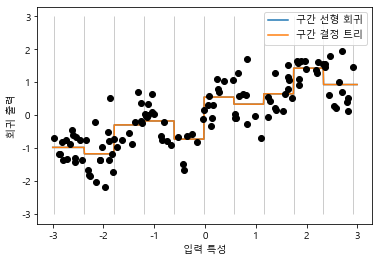

In [16]:
# 원핫인코딩된 결과로 선형회귀모델, 결정트리모델 다시 만들기
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:,0], y, 'o',c='k')
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

- 선형 회귀 모델롸 결정 트리가 같은 예측을 만들어냄!
    - **선형 모델이 훨씬 유연해짐**(구간분할/이산화 변환으로 이득을 얻음)
        - 각 구간에 대해 상숫값 즉, **절편**을 학습함 (기울기 학습 X)
    - 반면 결정트리는 덜 유연해짐
        - **트리모델을 데이터를 자유롭게 나눠서 학습할 수 있으므로, 트성의 값을 구간으로 나누는 것은 아무런 득이 되지 않음**
- 구간 분할이 모델성능을 높이는데 아주 좋은 방법이 될 수 있을 때
    - **일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원 데이터셋이라 선형모델을 사용해야할 때**

# 상호작용과 다항식
- 특성을 풍부하게 나타내는 또 하나의 방법으로 원본 데이터에 상호작용(interaction)과 다항식(polynomial)을 추가하는 것
- 이런 종류의 특성 공학은 '통계적 모델링'에서 자주 사용하지만, 일반적인 머신러닝 애플리케이션에도 많이 적용함

## 기울기 학습 추가
- 이전 구간 분할에서 절편(상수값)만 학습함 -> 기울기 학습 추가! (11차원 data set 만들어짐)(**원본 특성을 더한**)
    - 방법: 구간으로 분할된 데이터에 **원래 특성(X축)**을 다시 추가하면 됨

In [17]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)   # 11차원됨

(120, 11)


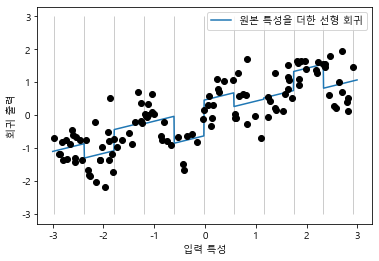

In [20]:
# 기울기 추가한 데이터로, 선형모델 다시 만들기
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])

plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:,0], y, 'o', c='k')

- 각 구간의 절편과 기울기를 학습했지만, 기울기가 모든 구간에 걸쳐 동일함(x 축 특성이 하나이므로 기울기도 하나) -> 별로 유용하진 않음

## 기울기 학습 추가 + 상호작용 특성 추가
- 기울기가 각 구간에서 다른 기울기를 가지게 수정
    - 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성 추가 (이 특성이 구간 특성과 **원본 특성의 곱**)

In [21]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


- 10차원 + 10차원(10개 구간별 기울기: 구간에 원본 특성을 곱한 값) = 20차원
- 구간안에서는 원본 특성이고, 다른 곳(구간)에서는 0임

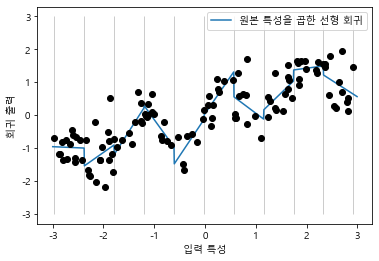

In [22]:
# 상호작용 특성 추가한 데이터로, 선형모델 다시 만들기
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])

plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:,0], y, 'o', c='k')

- 각 구간에서 절편과 기울기가 모두 다름

## 다항식 추가
- 원본 특성의 다항식 추가 방법(PolynomialFeatures class에 구현되어있음)
    - 특성 x가 주어지면 `x**2, x**3, x**4,...`등을 시도해볼 수 있음
    - 기본값 'include_bias=True'는 절편에 해당하는 1인 특성 추가함

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# x**10까지 고차항 추가
# 기본값인 'include_bias=True'는 절편에 해당하는 1인 특성 추가함
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [24]:
X_poly.shape   # 10차원 사용했으므로, 10개 특성 생성됨

(120, 10)

In [25]:
print('X 원소:\n', X[:5])
print('X_poly 원소:\n', X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [27]:
# 각 특성의 차수를 알려주는 get_feature_names 메서드
print('항 이름:\n', poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


- 원본특성 각 데이터 포인트에 원본값+2~10차원 다항식 추가됨

Text(0.5, 0, '입력 특성')

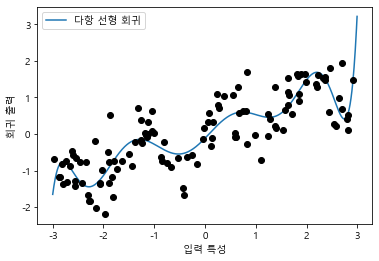

In [28]:
# 다항식 특성을 선형 모델과 함께 사용 => 전형적인 다항 회귀(polynomial regression)모델이 됨
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

- 다항식 특성 추가로 1차원 데이터셋에서도 매우 부드러운 곡선을 만듬
- 그러나 고차원 다항식 은 데이터가 부족한 영역에서 **너무 민감하게 작동함**(시작, 끝점에 급상승 함)

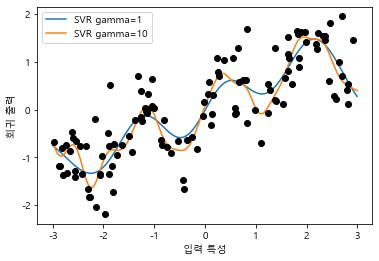

In [29]:
# 비교 - 아무런 변환도 하지 않은 원본 데이터에 커널 SVM 모델 학습
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

- 더 복잡한 커널 SVM을 사용해, 특성 데이터 변환하지 않고! 다항 회귀와 비슷한 복잡도를 가진 예측을 만듬

## 보스턴 주택 가격 data set - 상호작용, 다항식 실습

In [30]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# data scale 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# 차수 2로해서 다항식 특성 추가
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train.shape:', X_train.shape)
print('X_train_poly.shape:', X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


- 13 -> 105개로 확장됨
    - 원래특성+원래 특성의 제곱 + 가능한 두 특성의 모든 조합 = 104개
    - 기본값 설정으로 절편 1개도 추가됨

In [33]:
# 어떤 곱을 했는지 확인 - get_feature_names
print('다항 특성 이름:\n', poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


- 상수항(절편), 원본특성(0~12), 제곱항 모든 가능한 조합

### Ridge

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수:{:.3f}'.format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('상호작용 특성이 없을 때 점수:{:.3f}'.format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수:0.621
상호작용 특성이 없을 때 점수:0.753


- 상호작용과 다항식 특성이 Ridge의 성능을 높임

### RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수:{:.3f}'.format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print('상호작용 특성이 없을 때 점수:{:.3f}'.format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수:0.795
상호작용 특성이 없을 때 점수:0.775


- 상호작용과 다항식을 추가하면 성능이 조금 떨어짐
- 랜덤포레스트는 특성을 추가하지 않아도 충분히 복잡한 모델이기때문에, 특성을 추가하지 않아도 특성 추가한 Ridge모델과 성능 맞먹음

# 일변량 비선형 변환
- log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용
    - **선형 모델, 신경망 등 각 특성의 스케일과 분포에 민감한 모델들에 유용**
    - log, exp 함수는 데이터의 스케일을 변경해, 선형모델과 신경망의 성능을 올리는데 도움을 줌
    - sin, cos 함수는 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리
    - 이런 변환이 도움이 되는 전형적인 유형: **정수 카운트 데이터**
- 대부분의 모델은 각 특성이(회귀에서는 taget 값도) **정규분포**와 비슷할 때 최고의 성능을 냄(트리기반 모델 제외)

In [37]:
# 실제 데이터 속성과 비슷한 카운트 데이터 생성(특성은 모두 정수, 응답은 실수)
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org)) 
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [39]:
len(X)

1000

In [38]:
print('특성 출현 횟수:\n', np.bincount(X[:,0]))   # bincount는 항상 0부터 시작!

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


- 2가 68번으로 가장 많이 나타남
- 큰값의 수는 빠르게 줄어듬(중간중간 큰값 일부 존재)

Text(0.5, 0, '값')

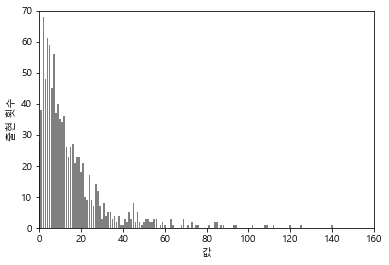

In [40]:
# 히스토그램 
plt.xlim(0, 160)
plt.ylim(0,70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

Text(0.5, 0, '값')

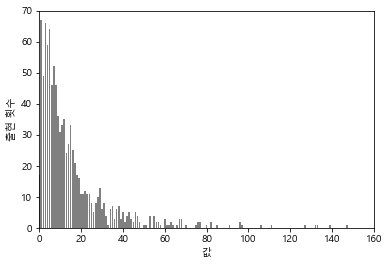

In [41]:
# 히스토그램 
plt.xlim(0, 160)
plt.ylim(0,70)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

Text(0.5, 0, '값')

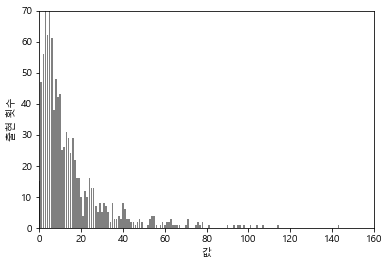

In [43]:
# 히스토그램 
plt.xlim(0, 160)
plt.ylim(0,70)
bins = np.bincount(X[:, 2])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

- 작은 수치가 많고 큰 수치는 몇 안되는 분포 - 실제로 자주 나타남 - 카운트 데이터의 전형적인 분포는 푸아송(Poisson)분포
    - 푸아송 분포: 단위 시간 안에 일어날 이벤트 횟수를 표현하는 확률 분포
    - 이런 분포는 선형 모델이 잘 처리하지 못함

In [44]:
# 아무 변형 가하지 않은 상태로 Ridge 회귀 적용
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.622


- 성능 비교적 낮게 나옴

In [45]:
# log 적용해서 정규분포 형태로 만들어주기

X_train_log = np.log(X_train+1)   # 1안더하고 np.log1p해줘도됨
X_test_log = np.log(X_test+1)

Text(0.5, 0, '값')

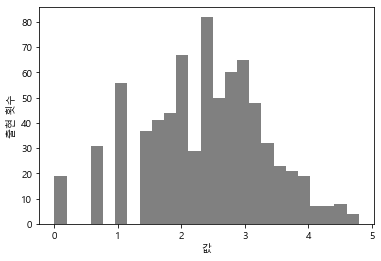

In [46]:
# log변환 후, 분포 시각화
plt.hist(X_train_log[:,0], bins=25, color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

- 데이터의 분포가 덜 치우쳐있으며, 매우 큰 값을 가진 이상치가 안보임

In [47]:
# log 변환된 data로 Ridge 적용
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.875


- log 변환으로 모델 성능 크게 향상됨

- 이런 특성 변환은 선형 모델에서 필수임
- 가끔 회귀에서 타깃 변수 y를 변환하는 것이 좋을 때도 있음(y가 카운트 데이터 특성을 가진 경우 등)

- 구간 분할, 다항식, 상호작용은 선형 모델이나 나이브 베이즈 같은 덜 복잡한 모델의 성능에 큰 영향을 줄 수 있음
- 하지만 트리기반 모델에는 영향 없음
- SVM, 최근접 이웃(KNN), 신경망 같은 모델은 가끔 이득을 볼 수도 있으나, 선형모델보다는 영향이 뚜렷하지 않음